In [1]:
# Import required libraries

import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
# get the data

data = yf.download("TSLA, SPY", start="2022-01-01", end="2023-01-01")

asset = data["Adj Close"].TSLA
benchmark = data["Adj Close"].SPY

[*********************100%***********************]  2 of 2 completed


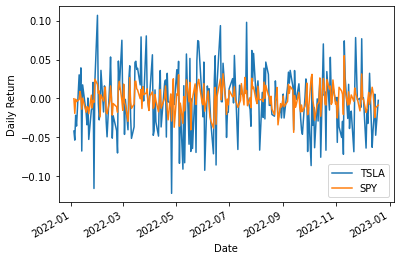

In [3]:
# get the returns and plot them.

asset_returns = asset.pct_change().dropna()
benchmark_returns = benchmark.pct_change().dropna()

asset_returns.plot()
benchmark_returns.plot()
plt.ylabel("Daily Return")
plt.legend()

# Save the figure.
plt.savefig("./Images/DailyReturn.jpg")

## Find the portfolio’s alpha and beta

In [4]:
# Linear regression models have an alpha term and one or more beta terms (plus an error)
# Alpha is the intercept and beta is the slope of the line that minimizes the error between all the points on a scatter plot

X = benchmark_returns.values
Y = asset_returns.values

In [5]:
def linreg(x, y):
    # Add a column of 1s to fit alpha
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y, x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    return model.params[0], model.params[1]

In [6]:
alpha, beta = linreg(X, Y)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: -0.0019385346859484176
Beta: 1.713418887268629


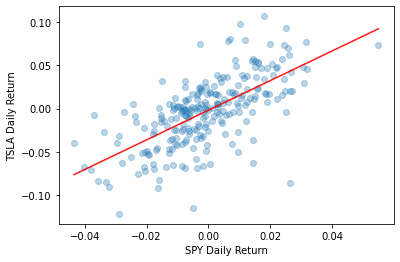

In [7]:
# Plot the returns and the regression line.

X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

# Plot the raw data
plt.scatter(X, Y, alpha=0.3)
plt.xlabel("SPY Daily Return")
plt.ylabel("TSLA Daily Return")

# Add the regression line
plt.plot(X2, Y_hat, 'r', alpha=0.9);

# Save the figure.
plt.savefig("./Images/LinearRegression.jpg")

## Hedge beta

In [8]:
# construct a beta-hedged portfolio

portfolio = -1 * beta * benchmark_returns + asset_returns
portfolio.name = "TSLA + Hedge"

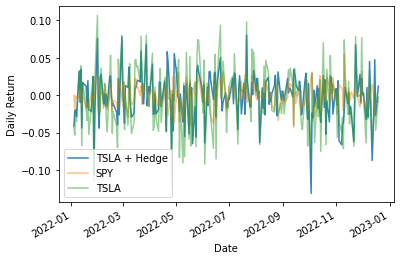

In [9]:
# exposure is concentrated on your source of alpha.

portfolio.plot(alpha=0.9)
benchmark_returns.plot(alpha=0.5);
asset_returns.plot(alpha=0.5);
plt.ylabel("Daily Return")
plt.legend();

# Save the figure.
plt.savefig(f"./Images/HedgeDailyReturns.jpg")

In [10]:
# Run the regression on the portfolio to make sure you removed the beta while keeping the alpha.

P = portfolio.values
alpha, beta = linreg(X, P)
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

Alpha: -0.0019385346859484187
Beta: -2.6020852139652106e-16
